**Felipe Segundo Abril Bermúdez**

**Nota:** 

* La parte del Initial Data Analysis (IDA) esta al final del texto como continuación del informe
* Revisar como lo hace la secretaria de salud:
* Revisar como se aborda este problema actualmente en la literatura: 

**<center><font size = "6"> Estudio de recursos sanitarios de hospitalización general generados por la pandemia de SARS-CoV-2</font> </center>**

# <center> $\color{red}{\text{Entendimiento del negocio}}$ </center>

## $\color{orange}{\text{Introducción}}$

La secretaría distrital de salud (SDS) es la organización responsable de garantizar el ejercicio efectivo del derecho a la salud de toda la población de Bogotá. En este orden de ideas, la SDS ha sido la organización encargada de establecer medidas de control y mitigación del virus *SARS-CoV-2* en la ciudad desde su llegada el 6 de marzo de 2020 en un vuelo proveniente de Milán, y que en la actualidad ha reportado más de $1300\;000$ casos en la ciudad. En la toma de medidas se han hecho intervenciones farmacológicas (IF) como protocolos de bioseguridad, la ampliación de recursos sanitarios en la ciudad y estrategias de vacunación, sin embargo, debido a la limitación de no poder expandir indefinidamente los recursos sanitarios, se ha alcanzado un alto porcentaje de ocupación (del orden de $94\%$ en la segunda ola vivida en la ciudad en el mes de enero de $2021$), generando un alto estrés en el sistema de salud en largos periodos de tiempo. Esto ha conllevado a restricciones totales en la movilidad y cuarentenas sectorizadas a nivel de localidades y UPZ, así como toques de queda y pico y cédula generalizado. Luego, se hace necesario poder cuantificar el potencial impacto de diferentes IF o intervenciones no farmacológicas (INF) como el uso de tapabocas, cuarentenas sectorizadas y restricciones de movilidad. Por lo demás, actualmente la ciudad se encuentra en una tercera ola de *SARS-CoV-2* que podría llegar a saturar los recursos sanitarios de la ciudad instalados hoy en día.

El secretario distrital de salud Alejandro Gómez López junto a la subsecretaría distrital de salud María Clemencia Mayorga Rámirez manejan todos los procesos de la SDS, dentro de estos se encuentra la Subsecretaría de Salud Pública - Dirección Epidemiología, Análisis y Gestión de Políticas de Salud Colectiva - Subdirección de Vigilancia en Salud Pública (*SSP-DEAGPSC-SVSP*) donde pertenece el equipo de Ánalisis de Situación de Salud (*ASIS*). En el equipo ASIS es precisamente donde se desenvuelve el equipo de modelación matemática conformada por físicos, matemáticos y estadísticos. Este equipo se concentra en hacer proyecciones de potenciales escenarios del rumbo de la epidemia en la ciudad de Bogotá para la ocupación de UCI utilizando un modelo de ecuaciones diferenciales ordinarias no lineales acopladas. Aún así, no se puede olvidar que los recursos sanitarios de la ciudad no corresponde unicamente a la ocupación de UCI sino también a la ocupación de camas de hospitalización general. También, es claro que para el uso adecuado de estos modelos matemáticos se debe hacer uso de los datos reportados de forma pública por la SDS en *SALUDATA* lo cual obedece a un proceso de calibración y ajuste parámetros que necesita explorar diferentes bases de datos, pero que hasta el momento no ha sido desarrollado para ocupación de hospitalización general. Aquí, vale la pena aclarar que la SDS ha corroborado el beneficio de la minería de datos al contar con un *Data Lake* de bases de datos accesibles mediante un servidor de SQL. 

<img src="ORGANIGRAMA_SDS.png">

Tomado de: [**Organigrama Secretaría de Salud**](http://www.saludcapital.gov.co/paginas2/organigrama.aspx).

Específicamente, el modelo utilizado desde la SDS es el modelo [**Squire**](https://mrc-ide.github.io/squire/index.html) que es un modelo estocástico compartimental construido para la transmisión del SARS-CoV-2 a diferentes escalas espaciales pero teniendo en cuenta la interacción entre susceptibles y casos índices de diferentes grupos etarios ordenados en quinquenios. Para realizar esto, se ha tenido en cuenta los estudios de seroprevalencia desarrollados en Bogotá, así como el número de fallecidos hasta la fecha (según datos reportados) y el porcentaje de ocupación en cuidados intensivos. Es importante mencionar que estos datos no son de acceso público pero que son suministrados para el fin del estudio realizado en este informe.

Por lo tanto, en este proyecto de ciencia de datos se establece un estudio de la demanda de recursos sanitarios de hospitalización general generada por la pandemia de *SARS-COV-2* en la ciudad de Bogotá utilizando el proceso estándar entre industrias para la minería de datos (CRISP-DM). Todo lo anterior, con el fin de proveer a los tomadores de decisiones con una gama más amplia de evidencias que respalden su elección.

## $\color{orange}{\text{Objetivos y criterios de éxito}}$
El objetivo principal del proyecto es: diseñar e implementar un modelo matemático que permita realizar proyecciones de potenciales escenarios futuros de la ocupación de hospitalización general.

Se establecen como objetivos específicos para el desarrollo óptimo del proyecto:
* Desarrollar o implementar un modelo epidemiológico que permita desagregar la población por grupos etarios para la ciudad de Bogotá D. C.
* Construir los parámetros de tiempos de estancia entre compartimentos según los datos reportados por la SDS o ajustar y utilizar parámetros reportados.
* Calibrar las proyecciones del modelo utilizando los reportes de muerte en Bogotá.
* Realizar proyecciones de potenciales escenarios futuros de la ocupación de hospitalización general que sirvan como insumo a las subredes y entidades locales de salud para la generación de conocimiento.

Se establecen como criterios de éxito del proyecto:
* La revisión e implementación del modelo finalice a tiempo y sin sobrecostos.
* Adquirir los datos de tiempo de estancia entre compartimentos a partir de bases que posea la SDS.
* Lograr una correcta calibración del modelo que pueda ponderarse cuantitativamente.
* Realizar por lo menos una proyección de la ocupación de hospitalización general antes de la finalización de la tercera ola de _SARS-CoV-2_ en la ciudad.

## $\color{orange}{\text{Requerimientos, suposiciones y ligaduras}}$

Realizando una evaluación honesta de las responsabilidades del proyecto se establece lo siguiente:
* Existen restricciones legales sobre algunos conjuntos de datos que contienen información personal de los casos reportados. Por esta razón, todo el equipo de trabajo en este proyecto firmo un acuerdo legal de no divulgación de datos a terceros.
* Existe una posibilidad de la implementación de los resultados del proyecto como un tablero en la página de la alcaldía.
* El equipo de gestión (SDS) sólo espera ver los resultados del proyecto teniendo en cuenta que no se asume algún nivel específico de la calidad de los datos.

## $\color{orange}{\text{Recursos disponibles y posibles dificultades de la ejecución del proyecto}}$

En el proceso de planteamiento de este proyecto se identifican los siguientes recursos:

- **Recursos técnicos (hardware):** Servidor de la secretaría de salud para un rendimiento óptimo de las simulaciones y proyecciones a llevar a cabo con el modelo matemático.
- **Fuentes de datos:** Data Lake de la SDS que cuenta por lo menos con 12 bases de datos que contengan los ingresos históricos a servicios de hospitalización de las diferentes IPS en la ciudad. Adicionalmente se cuenta con una base de positivos en formato _csv_ que contienen el histórico de casos reportados durante el transcurso de la pandemia. Por último se tiene los datos públicos de _SALUDATA_ que se actualizan de forma diaria y son de acceso gratuito.
- **Recursos humanos:** Para poder entablar un desarrollo teórico-práctico y computacional acorde a las dinámicas que se han tenido para la toma de decisiones respecto a la pandemia de COVID-19 en Bogotá, se establece el dialogo con el equipo de expertos en epidemiología de la SDS.

Las posibles dificultades que contenga el proyecto son:
1. Limitación en el tiempo de ejecución del proyecto que haga que se extienda durante más tiempo.
2. Limitación en la calidad de las bases por datos mal reportados por las IPS o bases que no contengan llaves primarias que permitan relacionar las entidades con otro tipo de bases en el Data Lake.

Las soluciones que se propone respectivamente son:

1. Establecer un cronograma de trabajo que permita por lo menos el cumplimiento de los primeros 3 objetivos específicos del proyecto.
2. Estar en constante comunicación con el equipo de la SDS encargado del Data Lake para tener presente las posibles actualizaciones que contengan las bases de datos.

## $\color{orange}{\text{Análisis costo - beneficio}}$

Finalmente se concluye con un análisis (no muy detallado) de costo beneficio generado por este proyecto:

**Costos**

* Para el análisis y recopilación de datos se estima la necesidad de un contratista durante 4 meses que devenge un salario mensual de $5\;621\;100$.
* Para la implementación computacional del modelo matemático se estima el pago por hora de uso (a convenir) de un clúster que compila y corra las simulaciones.

**Beneficios**

* La conclusión del proyecto además de proveer a los tomadores de decisiones con más herramientas quedaría como un producto de la SDS que se podría utilizar ante otras posibles epidemias o para la generación de conocimiento en las subredes.
* El estudio de los tiempo de estancia permitiría entender el comportamiento de los servicios de salud durante los picos de cada una de las olas, lo cual implica la generación de otros sistemas de alerta en la ciudad mientras culmine la pandemia.

## $\color{blue}{\text{Traducción del proyecto al lenguaje de la mineria de datos}}$

Entendido el contexto de este proyecto desde el lenguaje de la organización (SDS) se presenta a continuación la traducción de los objetivos del proyecto en terminología de la ciencia de datos.

### $\color{orange}{\text{Objetivos y criterios de éxito}}$
Los objetivos específicos del estudio inicial que se completará este trimestre son:

* Utilizar las diferentes fuentes bibliográficas a los que tiene acceso la SDS para establecer un modelo matemático que describa la ocupación en hospitalización general (**estudio del estado del arte**).
* Utilizar la serie histórica de casos reportados para recopilarlos como un proceso estocástico que varía los tiempos de estancia en el tiempo (**profiling**).
* Diseñar la calibración del modelo matemático con los datos reportados en _SALUDATA_ (**secuencia de análisis**).
* Proyectar el modelo matemático con diferentes parámetros (escenarios) de tal manera que permitan hacer proyecciones de la ocupación de camas de hospitalización general (**secuencia de análisis**).

Se establecen como criterios de éxito del proyecto:

* Establecer ajustes a las distribuciones de tiempos de estancia entre compartimentos del modelo utlizando el test $\chi^{2}$ de bondad de ajuste como benchmark.
* Lograr una calibración del modelo que tenga un error porcentual o un error global inferior al $10\%$.
* Realizar por lo menos una proyección de la ocupación de hospitalización general y hacer seguimiento de estos datos proyectados durante las siguientes dos semanas posteriores de su publicación para ser contrastados con la nueva data que se pueda obtener al evolucionar la pandemia en la ciudad.

### $\color{orange}{\text{Plan de trabajo}}$
A continuación se presenta un cronograma para la ejecución óptima del proyecto.

| **Fase** | **Tiempo** | **Recursos** | **Riesgos** |
|:-:|:-:|:-:|:-:|
| Entendimiento del negocio | 1 semana | Todos los análisis | Cambio de presupuesto para  la ejecución del proyecto |
| Entendimiento de los datos | 2 semanas | Consultor de minería de datos, servidores de la SDS por horas | Problema en los datos,  problemas técnicos |
| Preparación de los datos | 4 semanas | Consultor de minería de datos, servidores de la SDS por horas | Problema en los datos,  problemas técnicos |
| Modelamiento | 3 semanas | Consultor de minería de datos, servidores de la SDS por horas, equipo experto en epidemiología | Problemas técnicos o servidores,  inhabilidad de encontrar el  modelo adecuado que capture la dinámica en hospitalización |
| Evaluación | 2 semanas | Consultor de minería de datos, servidores de la SDS por horas, equipo experto en epidemiología | Cambios de presupuesto,  inhabilidad de publicación  de proyecciones del modelo |

# <center> $\color{red}{\text{Entendimiento de los datos}}$ </center>

## $\color{orange}{\text{Introducción y colección inicial de datos}}$

Para hacer un correcto entendimiento de los datos y evitar posibles problemas a futuro es necesario entender los datos de hospitalización de *COVID-19* en Bogotá. Estos datos se recopilan de la información suministrada por SALUDATA desde el **15 de mayo de 2020** hasta la fecha actual, luego calculando el número de días posterior a esta fecha podemos tener los datos con las siguientes columnas:
* Fecha. 
* Camas asignadas COVID-19.
* Camas ocupadas COVID-19.
* Porcentaje de ocupación del sistema.

In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import date
import openpyxl

# Diferencia de fechas a partir del 15 de mayo de 2020
d0 = date(2020, 5, 20)
d1 = date.today()
delta = d1 - d0
# URL de los datos de SALUDATA
url = 'https://saludata.saludcapital.gov.co/osb/wp-content/uploads/medios/Ocupacion-Hospitalizacion-COVID-19.csv'
# Importación de datos en Pandas
df = pd.read_csv(url, index_col=0, encoding='latin-1', error_bad_lines=False, sep=';',
                 skiprows = [0,1,2,3], nrows=delta.days+5, usecols = [0,1,2,3])
df['Camas asignadas COVID 19'] = np.where(df['Camas asignadas COVID 19']<10,
                                          df['Camas asignadas COVID 19']*1000,
                                          df['Camas asignadas COVID 19'])
df['Camas Ocupadas COVID 19'] = np.where(df['Camas Ocupadas COVID 19']<10,
                                         df['Camas Ocupadas COVID 19']*1000,
                                         df['Camas Ocupadas COVID 19'])
df.tail(10)

,Camas asignadas COVID 19,Camas Ocupadas COVID 19,% Ocupación
Fecha,,,
4/07/2021,2668.0,2494.0,"93,48%"
5/07/2021,2662.0,2468.0,"92,71%"
6/07/2021,2628.0,2440.0,"92,85%"
7/07/2021,2627.0,2449.0,"93,22%"
8/07/2021,2579.0,2391.0,"92,71%"
9/07/2021,2526.0,2325.0,"92,04%"
10/07/2021,2464.0,2262.0,"91,80%"
11/07/2021,2373.0,2168.0,"91,40%"
12/07/2021,2334.0,2125.0,"91,05%"


In [2]:
wb = openpyxl.load_workbook('Hosp.xlsx')
ws = wb['meta_data']
md = pd.DataFrame(ws.values)
md.columns = md.iloc[0]
md = md.drop(0)
wb.save('Hosp_{}.xlsx'.format(d1))

xlr = pd.ExcelWriter('Hosp_{}.xlsx'.format(d1))
df.to_excel(xlr, 'hosp', float_format = '%.4f', index = True, encoding = 'latin-1')
md.to_excel(xlr, 'meta_data', float_format = '%.4f', index = False, encoding = 'latin-1')
xlr.save()
md.head(20)

,Metadato,Descripción,Unidad de medición
1,Serie de tiempo desde,2020,No aplica
2,Descripción de los datos,El porcentaje de ocupación mide la utilización...,No aplica
3,Utilidad,Permite establecer la proporción entre el núme...,No aplica
4,Periodicidad,Diaria,No aplica
5,Fuente de Información Numerador,Sistema integral de referencia y contrarrefere...,No aplica
6,Fuente de Información Denominador,Sistema integral de referencia y contrarrefere...,No aplica
7,Fecha,Periodo de reporte de información,Fecha (UTC)
8,Camas asignadas COVID 19,Total camas en hospitalización general asignad...,Número entero (integer)
9,Camas Ocupadas COVID 19,Número de camas ocupadas por pacientes en hosp...,Número entero (integer)
10,% Ocupación,Porcentaje de ocupación de camas de hospitaliz...,Porcentaje (double)


Dado que el interés del proyecto se concentra en la cantidad de recursos sanitarios de hospitalización general a través de un modelo matemático, en principio, los datos realmente importante y más prometedores serán las *camas ocupadas COVID-19*. Aún así, no se descarta la posibilidad de utilizar las otras dos columnas de datos que implican la real capacidad de respuesta del sistema de salud en Bogotá. También se resalta que la cantidad de datos recopilados por más de un año permiten tener un buen set para sacar conclusiones generalizables y conclusiones precisas.

Por último, vale la pena mencionar que esta base también la siguiente información adicional:

**Utilidad:** "Permite establecer la proporción entre el número de pacientes hospitalizados  con diagnóstico presuntivo o confirmado de Covid-19 de manera diaria, respecto a la capacidad instalada asignada para la atención de dicha patología."

**Fuente:** "Aplicativo SIRC - Camas Asignadas y ocupadas de hospitalización general adulto, reportadas por las IPS de la ciudad de Bogotá, así:  67 IPS de Red privada y 25 IPS red Pública. Corte: 02/05/2021 3:57 PM"

Así, esto reduce el universo del conjunto de datos a una muestra de 67 instituciones prestadoras de salud (IPS) privadas y 25 IPS públicas. Por consiguiente, se asume que esta data posee la suficiente calidad luego de un proceso de unión de diferentes bases que no nos atañe.

## $\color{orange}{\text{Descripción de los datos}}$

Ahora, se discute un poco más los valores que aparecen en las columnas del conjunto de datos.
* **Fecha:** Dato del tipo *datetime64* o *object* dentro de las categorías de pandas. Este valor permite conocer la fecha en cuestión para la cual se desea conocer la ocupación, disponibilidad y porcentaje de ocupación de hospitalización general. Se observa que en la forma en que se importa los datos, sirve como índice del dataframe.

* **Camas asignadas COVID-19:** Dato del tipo *int64* dentro de las categorías de pandas. Este valor corresponde al número de camas disponibles en hospitalización general para paciente con *COVID-19*.

* **Camas ocupadas COVID-19:** Dato del tipo *int64* dentro de las categorías de pandas. Este valor corresponde al número de camas ocupadas en hospitalización general para paciente con *COVID-19*.

* **Porcentaje de ocupación del sistema:** Dato del tipo *object* dentro de las categorías de pandas. Este valor corresponde a la proporción del número de camas ocupadas en hospitalización general respecto al número de camas disponibles en hospitalización general para paciente con *COVID-19*, en términos porcentuales. De hecho, se tiene la siguiente relación

\begin{equation}
\%\;Ocup=\frac{Camas\;ocupadas}{Camas\;Asignadas}\times100\%
\end{equation}

En general, también se debe resaltar que este conjunto de datos crece diariamente en un dato adicional para cada tributo descrito anteriormente.

In [3]:
df.dtypes

Camas asignadas COVID 19    float64
Camas Ocupadas COVID 19     float64
% Ocupación                  object
dtype: object

## $\color{orange}{\text{Exploración de datos y verificación de calidad}}$

Finalmente, en esta descripción de los datos vale la pena resaltar la siguiente figura que nos muestra al igual que el tablero de SALUDATA, la ocupación de hospitalización general en términos absolutos y en términos porcentuales. Además, esto corroborá la hipótesis inicial que el tercer pico de la pandemia sigue en aumento en la ciudad, es decir, la ciudad aún no ha superado la tercer ola de la pandemia. 

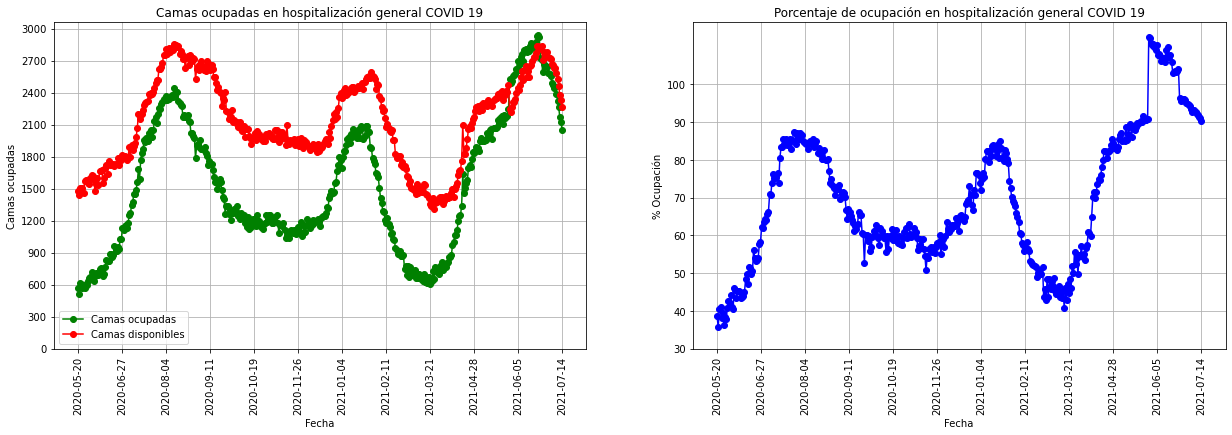

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

d0 = date(2020, 5, 20)
datelist = pd.date_range(start = d0, end = date.today(), periods = df['% Ocupación'].size) # Fechas
df['% Ocupación'] = df['Camas Ocupadas COVID 19']/df['Camas asignadas COVID 19']*100 # Porcentaje de ocupación 

plt.figure(figsize=(21,6))
plt.subplot(1,2,1)
plt.plot_date(datelist, df['Camas Ocupadas COVID 19'],color="green",marker="o",linestyle="-",label='Camas ocupadas')
plt.plot_date(datelist, df['Camas asignadas COVID 19'],color="red",marker="o",linestyle="-",label='Camas disponibles')
plt.xlabel('Fecha')
plt.xticks(pd.date_range(start = d0, end = date.today(), periods = 12), rotation='vertical')
plt.yticks(np.linspace(0,3000,11))
plt.ylabel('Camas ocupadas')
plt.legend()
plt.grid(b=True, which='major', axis='both')
plt.title('Camas ocupadas en hospitalización general COVID 19')
plt.subplot(1,2,2)
plt.plot_date(datelist, df['% Ocupación'],color="blue",marker="o",linestyle="-")
plt.xlabel('Fecha')
plt.xticks(pd.date_range(start = d0, end = date.today(), periods = 12), rotation='vertical')
plt.yticks(np.linspace(30,100,8))
plt.ylabel('% Ocupación')
plt.grid(b=True, which='major', axis='both')
plt.title('Porcentaje de ocupación en hospitalización general COVID 19')
plt.show()

Por último, se resalta que en este caso específico no hay pérdida de datos, errores tipográficos o inconsistencias en la codificación.

# <center> $\color{red}{\text{Análisis inicial de datos (IDA)}}$ </center>

## $\color{orange}{\text{Descripción de los metadatos y diseño de investigación}}$

Para comenzar la sección de análisis inicial de datos, se describe nuevamente y de forma breve los metadatos expuestos en la sección anterior de **Descripción de los datos**.

* **Descripción de los datos:** El porcentaje de ocupación mide la utilización de las camas de hospitalización general por los casos diarios por Covid-19 confirmados y sospechosos entre el máximo total de camas de hospitalización general asignadas para la atención de pacientes Covid-19 definidas por los prestadores de Servicios de Salud. Es importante señalar que el total de camas de hospitalización general asignadas se basa en el reporte dado por las IPS, resultante del análisis y planeación de su capacidad instalada para la atención de pacientes COVID-19. Estos datos pueden variar dependiendo de la demanda poblacional y su morbimortalidad.
* **Utilidad:** Permite establecer la proporción entre el número de pacientes hospitalizados en servicios generales (no UCI) con diagnóstico presuntivo o confirmado de Covid-19 de manera diaria, respecto a la capacidad instalada asignada para la atención de dicha patología, con el fin de orientar las decisiones sobre expansión y conversión.

Aquí vale la pena mencionar que el reporte ahora genera un informe diario de los datos en un archivo Excel *hosp_**fecha**.xlsx*. Para este fin se define una plantilla estándar que sirva como diccionario de los datos de camas en hospitalización general para Covid-19. 

In [5]:
md.head(20)

,Metadato,Descripción,Unidad de medición
1,Serie de tiempo desde,2020,No aplica
2,Descripción de los datos,El porcentaje de ocupación mide la utilización...,No aplica
3,Utilidad,Permite establecer la proporción entre el núme...,No aplica
4,Periodicidad,Diaria,No aplica
5,Fuente de Información Numerador,Sistema integral de referencia y contrarrefere...,No aplica
6,Fuente de Información Denominador,Sistema integral de referencia y contrarrefere...,No aplica
7,Fecha,Periodo de reporte de información,Fecha (UTC)
8,Camas asignadas COVID 19,Total camas en hospitalización general asignad...,Número entero (integer)
9,Camas Ocupadas COVID 19,Número de camas ocupadas por pacientes en hosp...,Número entero (integer)
10,% Ocupación,Porcentaje de ocupación de camas de hospitaliz...,Porcentaje (double)


En las preguntas de investigación se tienen dos principales:

1. ¿Cúal sería el número máximo de camas de hospitalización general para pacientes con Covid-19 estimados por los modelos epidemiológicos?
2. Teniendo en cuenta que la ocupación de hospitalización general indica la capacidad de respuesta real del sistema teniendo una capacidad máxima de atención y que la demanda de hospitalización general indica el número de camas realmente necesarias para atender a todos los pacientes con Covid-19, ¿Cuál podría ser el potencial exceso entre la ocupación y demanda de camas de hospitalización general para pacientes con Covid-19 estimados por los modelos epidemiológicos?

Así, para responder las anteriores incógnitas, se propone como diseño del estudio los siguientes pasos esenciales (que también obedecen a los **Objetivos y criterios de éxito** descritos en este informe).

* Revisión de fuentes bibliográficas a los que tiene acceso la SDS contrastados con el modelo matemático.
* Análisis de la serie de tiempo de ocupación de hospitalización general para estimar posibles escenarios de respuesta del sistema de salud, principalmente en momentos de crisis (picos).
* Calibración del modelo matemático variando los tiempos de estancia de pacientes en hospitalización general.
* Proyección del modelo matemático en los posibles escenarios de respuesta definidos en pasos previos.

Es importante resaltar que la serie de tiempo de ocupación de hospitalización general es una fuente de datos ya depurados por diferentes procesos en la SDS y que para fines de este estudio no serán tenidos en cuenta.

<img src="IDA_FLUJOGRAMA.png">

## $\color{orange}{\text{Procesamiento y limpieza de los datos}}$

Para la limpieza y procesamiento de los datos se agrega como descripción los diferentes pasos en los que se generan nuevos insumos a partir de los datos de camas disponibles y ocupadas en hospitalización general para Covid-19 (datos Saludata). Se resalta que los datos reportados en Saludata tienen procesos de limpieza y procesamiento que no se enfatizan en este estudio sino que se se asumen correctos para fines prácticos. De este último punto, se resaltan dos criterios esenciales: primero, la toma de muestra PCR o antigeno y procesamiento en laboratorio para descartar o confirmar los casos detectados de SARS-CoV-2/Covid-19 en Bogotá, segundo, la filtración de estos últimos por estado clínico o ubicación del caso activo para notificarlo como caso en casa, hospitalizado o en UCI.

La generación de nuevos insumos de datos surgen en la calibración del modelo donde se calibra la curva epidémica de demanda de hospitalización general y a partir de esta surgen los diferentes compartimentos utilizados en el modelo [Squire](https://mrc-ide.github.io/squire/index.html) (explicado en la introducción del informe). En este punto los datos obtenidos luego de varias simulaciones, se tratan de forma estadística para obtener los percentiles 5%, 50% (mediana) y 95% para cada día desde la primera fecha de muerte (23 de marzo de 2020).

Por último, a partir de los datos obtenidos de la calibración, se proyectan los potenciales escenarios futuros definidos a partir de ciertas medidas de orden publico generando diferentes valores de demanda y ocupación de hospitalización general los cuales sirven para la generación de gráficas que permitan comparar los diferentes escenarios proyectados y estimar un valor máximo entre las diferentes olas que ha vivido la ciudad.

## $\color{orange}{\text{Filtrado de datos}}$

Para la filtración de datos, el proceso que se requiere es el ajuste de la curva epidémica a los datos reportados por la SDS (calibración del modelo), teniendo como métrica para la calidad del ajuste, la diferencia entre el promedio de las simulaciones y el dato reportado en Saludata, a modo de ejemplo se coloca la calibración hecha con los datos hasta el 4 de julio de 2021. Dentro de las dificultades identificadas en este proceso se encuentra el ajuste de los tiempos de estancia en hospitalización general que se calibran de tal forma que se pueda reproducir los datos reportados pero sin poder corroborar (ya sea con investigaciones clínicas) si los diferentes tiempos de estancia en el modelo son acordes a la relaidad que viven las diferentes instituciones de salud pública.

<img src="HOSPITAL_CALIBRACION_2021_07_05.png">

## $\color{orange}{\text{Posprocesamiento de los datos}}$

En el posprocesamiento de los datos, lo que se puede apreciar por lo menos en la calibración del modelo es un buen ajuste entre los diferentes compartimentos del modelo comparado a otros datos (no utilizados en este estudio) publicados por la SDS, a modo de ejemplo se muestra lo obtenido para UCIs luego de la calibración del modelo Squire con tiempos de estancia en hoospitalización general para las personas que sobreviven o fallecen.

<img src="UCI_CALIBRACION_2021_07_05.png">